### Assignment 5: K Means and K Medoids Clustering

### Import all neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installing numpy for numerical operations
!pip install numpy

#Installinf pandas for data manipulation and analysis
!pip install pandas

#Installing matplotlib for data visualization
!pip install matplotlib

#Installing seaborn for enhanced data visualization
!pip install seaborn

#Installing scikit-learn for machine learning tools
!pip install scikit-learn

#Installing scipy for scientific and technical computing
!pip install scipy

#Installing jupyter for interactive data analysis
!pip install jupyter


In [3]:
police = pd.read_csv("/Users/virensasalu/Documents/coding/UOA Coding Files/Course 2/download.csv")
police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4478 non-null   int64  
 1   name                     4478 non-null   object 
 2   date                     4478 non-null   object 
 3   manner_of_death          4478 non-null   object 
 4   armed                    4230 non-null   object 
 5   age                      4309 non-null   float64
 6   gender                   4473 non-null   object 
 7   race                     4105 non-null   object 
 8   city                     4478 non-null   object 
 9   state                    4478 non-null   object 
 10  signs_of_mental_illness  4478 non-null   bool   
 11  threat_level             4478 non-null   object 
 12  flee                     4299 non-null   object 
 13  body_camera              4478 non-null   bool   
dtypes: bool(2), float64(1), 

### Let's pre-process the data

In [5]:
# Remove all the rows that contain missing value
police = police.dropna()

In [6]:
police.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [7]:
police = police.drop(['id','date','name','city','state'],axis=1)

df = copy.deepcopy(police)
df.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera
0,shot,gun,53.0,M,A,True,attack,Not fleeing,False
1,shot,gun,47.0,M,W,False,attack,Not fleeing,False
2,shot and Tasered,unarmed,23.0,M,H,False,other,Not fleeing,False
3,shot,toy weapon,32.0,M,W,True,attack,Not fleeing,False
4,shot,nail gun,39.0,M,H,False,attack,Not fleeing,False


In [8]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [9]:
df = pd.get_dummies(df, columns=['signs_of_mental_illness','body_camera'])

In [10]:
df.head()

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True
0,0,30,53.0,1,0,0,2,False,True,True,False
1,0,30,47.0,1,5,0,2,True,False,True,False
2,1,75,23.0,1,2,1,2,True,False,True,False
3,0,74,32.0,1,5,0,2,False,True,True,False
4,0,53,39.0,1,2,0,2,True,False,True,False


### Let's perform K-Means Clustering on the data

### Question 1: 2 Marks
**Perform K-Means clustering on 1 to 10 clusters using the pre processed data and find each cluster's inertia rate. Also, find the optimal number of clusters.**

1805884.07043407
741383.7066057208
397045.32088616095
325483.754218938
260595.294551267
220953.62984373653
184431.4941611687
152709.40070101502
133243.1133709745
114874.64537741586


Text(0, 0.5, 'Inertia --->')

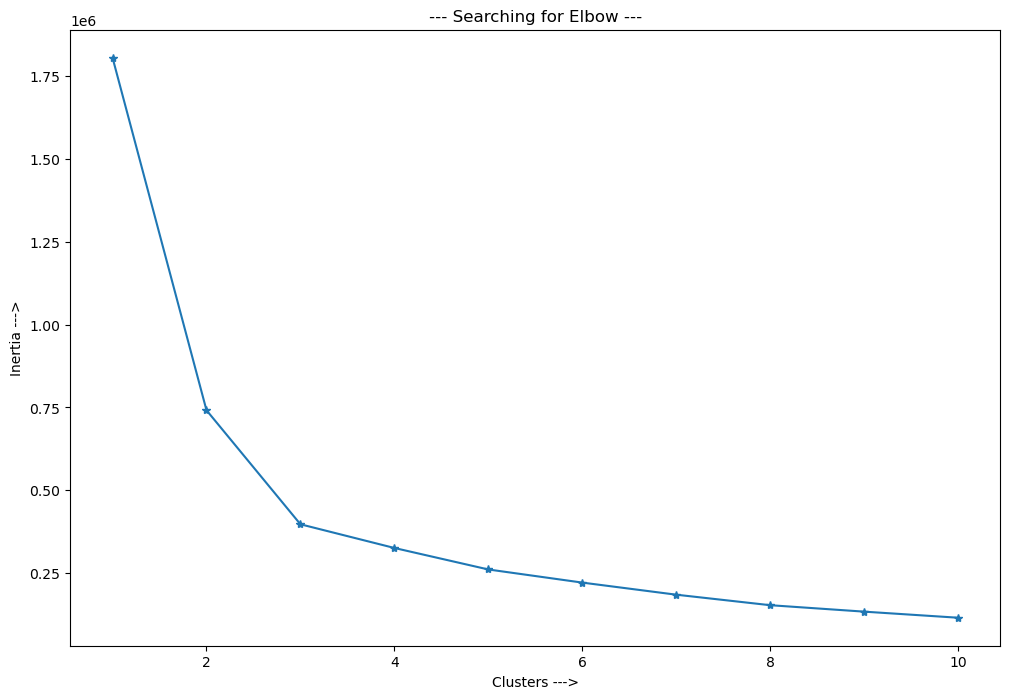

In [11]:
from sklearn.cluster import KMeans
clusters = []
    
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=1).fit(df)
    clusters.append(km.inertia_)
    print(km.inertia_)
 

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(range(1,11),clusters, marker = '*')
ax.set_title('--- Searching for Elbow ---')
ax.set_xlabel('Clusters --->')
ax.set_ylabel('Inertia --->')

In [12]:
print("Optimal number of cluster is 3 (k value) .")

Optimal number of cluster is 3 (k value) .


### Question 2: 2 Marks
**Perform KMeans Clustering on 3 clusters and assign the cluster labels to a new attribute 'clusters'.**

In [13]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df)
df_cluster = df.copy()
df_cluster['clusters'] = kmeans.labels_
df_cluster.head()

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True,clusters
0,0,30,53.0,1,0,0,2,False,True,True,False,0
1,0,30,47.0,1,5,0,2,True,False,True,False,0
2,1,75,23.0,1,2,1,2,True,False,True,False,1
3,0,74,32.0,1,5,0,2,False,True,True,False,1
4,0,53,39.0,1,2,0,2,True,False,True,False,1


### Cluster Profiling

In [14]:
cluster_profiles = df_cluster.groupby('clusters').mean()
cluster_profiles

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True
clusters,,,,,,,,,,,
0,0.049571,31.956149,51.851287,0.950429,3.914204,0.298379,1.777884,0.706387,0.293613,0.907531,0.092469
1,0.074896,74.611650,33.324549,0.938974,3.062413,0.675451,1.443828,0.771151,0.228849,0.857143,0.142857
2,0.046487,31.925515,29.268357,0.963022,2.984680,0.328579,1.589540,0.765452,0.234548,0.880613,0.119387


In [15]:
cluster_profiles = df_cluster.groupby("clusters").mean()
cluster_profiles['Freq']= df_cluster.clusters.value_counts().sort_index()
cluster_profiles.T

clusters,0,1,2
manner_of_death,0.049571,0.074896,0.046487
armed,31.956149,74.611650,31.925515
age,51.851287,33.324549,29.268357
gender,0.950429,0.938974,0.963022
race,3.914204,3.062413,2.984680
threat_level,0.298379,0.675451,0.328579
flee,1.777884,1.443828,1.589540
signs_of_mental_illness_False,0.706387,0.771151,0.765452
signs_of_mental_illness_True,0.293613,0.228849,0.234548
body_camera_False,0.907531,0.857143,0.880613


In [16]:
cluster_profiles.style.highlight_max(color="silver", axis=0)

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True,Freq
clusters,,,,,,,,,,,,
0,0.049571,31.956149,51.851287,0.950429,3.914204,0.298379,1.777884,0.706387,0.293613,0.907531,0.092469,1049
1,0.074896,74.611650,33.324549,0.938974,3.062413,0.675451,1.443828,0.771151,0.228849,0.857143,0.142857,721
2,0.046487,31.925515,29.268357,0.963022,2.984680,0.328579,1.589540,0.765452,0.234548,0.880613,0.119387,1893


### Question 3: 2 Marks
**Share you insights from the cluster profiles, 1 observation each.**

### Intepretations:

- Cluster 0: this cluster has the oldest Male contingent likely to show mental sickness with moderate 'threat level' also are shot (manner of death) which is highly likely.
- cluster 1 : Has average age of approx. 33 years old male contingents with likely to show mental sickness, and are highly Threatening (threat level) predominantly shot and less likely to flee
- cluster 2: This cluster have lowest age average just below 30. They show less likely to be mentally sick and not threatening. also highly unlikely to flee. They are shot dead and predominantly men.  

## K-Medoids Clustering or PAM

- Medoids are representative objects of a data set or a cluster within a data set whose sum of dissimilarities to all the objects in the cluster is minimal. K-Medoids (also called Partitioning Around Medoid)

In [17]:
#installing K Medoids, need sklear-extra, hence installing sklear-extra library
!pip install scikit-learn-extra

### Question 4: 2 Marks
**Perform K Medoids or PAM on 1 to 10 clusters using the pre processed data and find each cluster's inertia rate.**

In [18]:
from sklearn_extra.cluster import KMedoids          
clusters = []
for i in range(1, 11):
    km = KMedoids(n_clusters=i, random_state=1).fit(df)
    clusters.append(km.inertia_)
    print(km.inertia_)

68980.03620208926
56359.58814678746
32664.536696287338
28776.023806173373
26098.652894748942
25544.274661814285
23587.68001922701
23244.293832559782
21496.67015595424
20167.1582591867


### Question 5: 2 Marks
**Check the Silhouette scores for clusters ranging from 2 to 10 and also visualize them. Find out the optimal number of clusters.**

For n_clusters = 2, the silhouette score is 0.30128748475434614
For n_clusters = 3, the silhouette score is 0.5215778827107759
For n_clusters = 4, the silhouette score is 0.4099825101260743
For n_clusters = 5, the silhouette score is 0.43348558242811247
For n_clusters = 6, the silhouette score is 0.38185773511329385
For n_clusters = 7, the silhouette score is 0.427858941948385
For n_clusters = 8, the silhouette score is 0.4127408630790201
For n_clusters = 9, the silhouette score is 0.4130675437931936
For n_clusters = 10, the silhouette score is 0.40325410196089356


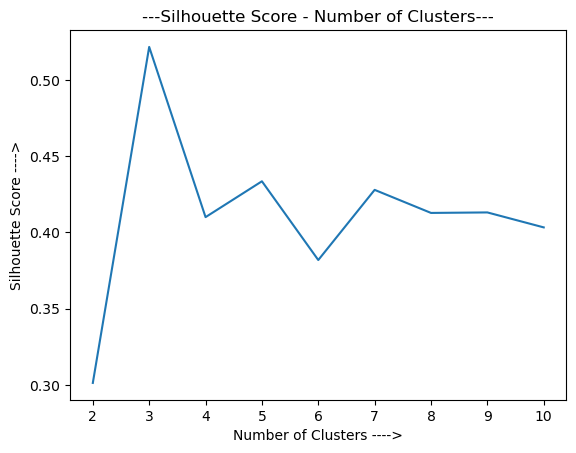

In [19]:
from sklearn.metrics import silhouette_score

sil_score = []
cluster_list = range(2, 11)

for n_clusters in cluster_list:
    clusterer = KMedoids(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    score = silhouette_score(df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score) 
plt.xlabel('Number of Clusters ---->')
plt.ylabel('Silhouette Score ---->')
plt.title('---Silhouette Score - Number of Clusters---')
plt.show()

In [20]:
print("Optimal number of cluster is 3 .")

Optimal number of cluster is 3 .


In [21]:
kmedoids = KMedoids(n_clusters = 3,random_state = 1)
kmedoids.fit(df)
df_cluster_Med = df.copy()
df_cluster_Med['clusters_Med'] = kmedoids.labels_
df_cluster_Med.head()

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True,clusters_Med
0,0,30,53.0,1,0,0,2,False,True,True,False,2
1,0,30,47.0,1,5,0,2,True,False,True,False,2
2,1,75,23.0,1,2,1,2,True,False,True,False,1
3,0,74,32.0,1,5,0,2,False,True,True,False,1
4,0,53,39.0,1,2,0,2,True,False,True,False,1


### K Medoids Cluster Profiling

**Group the cluster labels by their mean and find the Frequecy of each grouped clusters**

In [22]:
cluster_profiles = df_cluster_Med.groupby("clusters_Med").mean()
cluster_profiles['Freq']= df_cluster_Med.clusters_Med.value_counts().sort_index()
cluster_profiles.T

clusters_Med,0,1,2
manner_of_death,0.047388,0.074896,0.047926
armed,31.957997,74.611650,31.899539
age,29.060312,33.324549,51.458065
gender,0.963382,0.938974,0.950230
race,2.945611,3.062413,3.950230
threat_level,0.328487,0.675451,0.299539
flee,1.590738,1.443828,1.769585
signs_of_mental_illness_False,0.766290,0.771151,0.706912
signs_of_mental_illness_True,0.233710,0.228849,0.293088
body_camera_False,0.878837,0.857143,0.909677


In [23]:
cluster_profiles.style.highlight_max(color="silver", axis=0)

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True,Freq
clusters_Med,,,,,,,,,,,,
0,0.047388,31.957997,29.060312,0.963382,2.945611,0.328487,1.590738,0.766290,0.233710,0.878837,0.121163,1857
1,0.074896,74.611650,33.324549,0.938974,3.062413,0.675451,1.443828,0.771151,0.228849,0.857143,0.142857,721
2,0.047926,31.899539,51.458065,0.950230,3.950230,0.299539,1.769585,0.706912,0.293088,0.909677,0.090323,1085


### Interpretation
* Cluster 0  = Highest number of victims belong this group. These people are also young compared to other groups.
* Cluster 1 = Least number of victims belong to this group. These people are mentally stable.
* Cluster 2 = Most of the victims who are older comparitively belong to this group. These people are having highest sign of mental illness.


### Visualization of clusters

- Since most of our variables are categorical in nature let's plot countplot to visualize the formed clusters.


#### K Means Clusters 

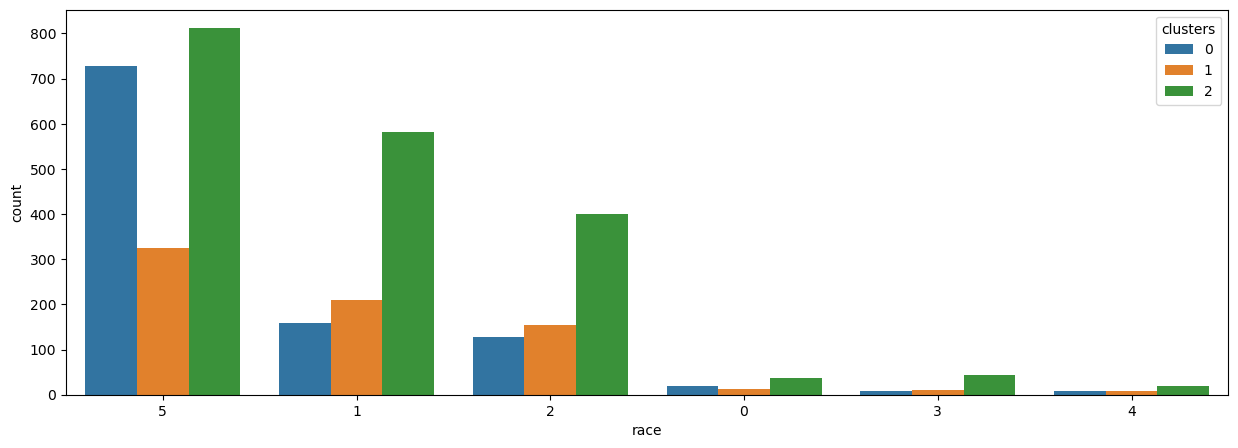

In [24]:
# Plot race clusters
plt.subplots(figsize = (15,5))
sns.countplot(x=df_cluster['race'],order=df_cluster['race'].value_counts().index,hue=df_cluster['clusters'])
plt.show()

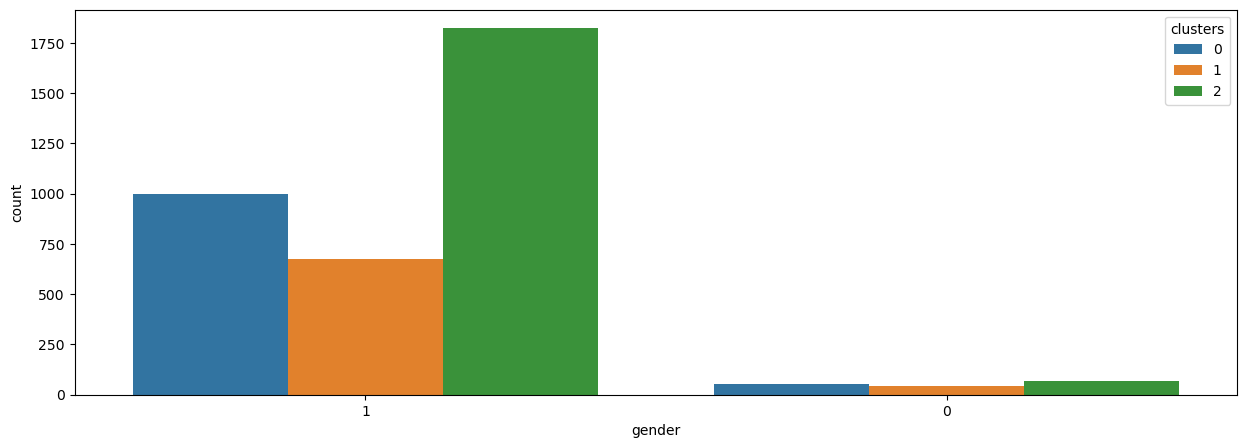

In [25]:
# Plot gender clusters
plt.subplots(figsize = (15,5))
sns.countplot(x=df_cluster['gender'],order=df_cluster['gender'].value_counts().index,hue=df_cluster['clusters'])
plt.show()

#### K Medoids Clusters

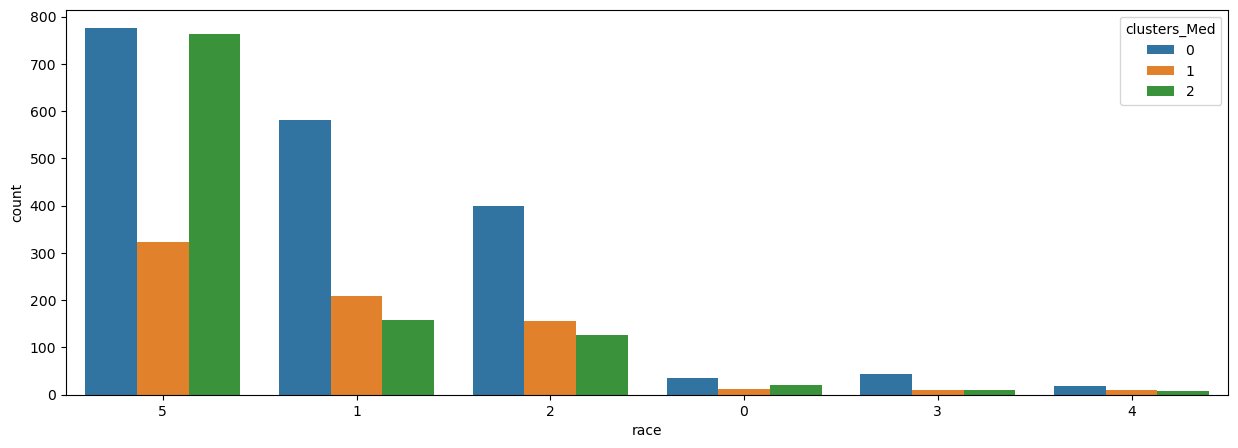

In [26]:
# Plot race clusters
plt.subplots(figsize = (15,5))
sns.countplot(x=df_cluster_Med['race'],order=df_cluster_Med['race'].value_counts().index,hue=df_cluster_Med['clusters_Med'])
plt.show()

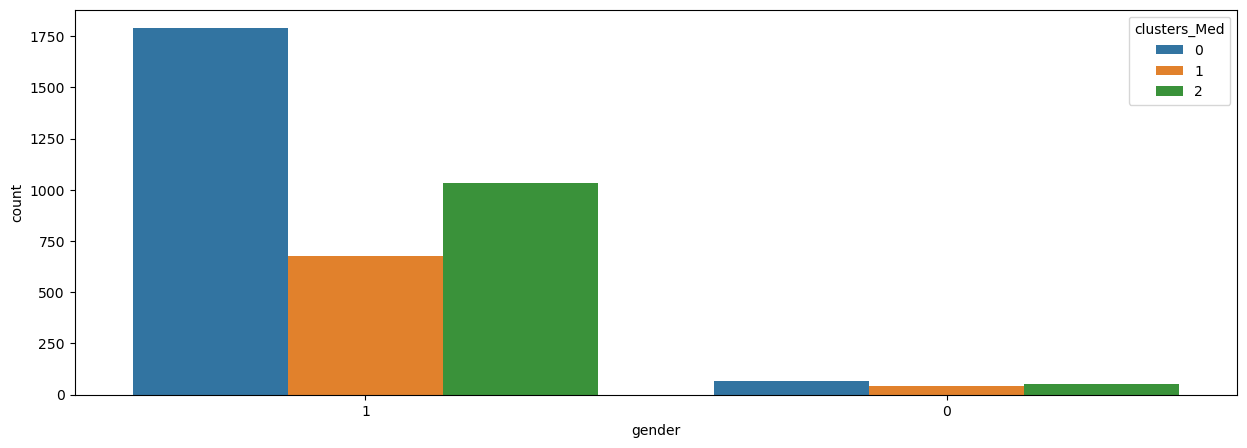

In [27]:
# Plot gender clusters
plt.subplots(figsize = (15,5))
sns.countplot(x=df_cluster_Med['gender'],order=df_cluster_Med['gender'].value_counts().index,hue=df_cluster_Med['clusters_Med'])
plt.show()

#### Conclusion: 
* From Cluster profiling and Visualization, we can observe that K-means and K-medoids(PAM) both are giving almost the same results.
* Optimal number of clusters seems to be 3.
* Since most of our variables are categorical in nature we can rely on K Medoids.
